# Object Tags Demo
Joshua Placidi

In [1]:
import json

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib.patches as patches
from pylab import rcParams

rcParams["figure.figsize"] = 12, 24

#### Loading object tags using json, file is quite large so can take some time to load

In [2]:
with open("object_tags.json") as f:
    object_tags = json.load(f)
    
print('Number of images:', len(object_tags.keys()))

Number of images: 123287


#### Accessing tags for an image given its id
Keys are stored as strings so make sure image_id = "1234" instead of 1234

In [3]:
image_id = "154329" # Can use any valid MS-COCO image id

source = 'coco' # Change to 'vg' or 'vinvl' to load from other sources

object_tags[image_id][source]

[{'label': 'sports_ball', 'class': 37, 'bbox': [9.68, 216.28, 12.78, 9.58]},
 {'label': 'baseball_bat', 'class': 39, 'bbox': [301.7, 208.83, 84.94, 34.44]},
 {'label': 'baseball_glove',
  'class': 40,
  'bbox': [469.76, 236.51, 26.71, 48.54]},
 {'label': 'person', 'class': 1, 'bbox': [41.17, 94.22, 62.35, 105.64]},
 {'label': 'person', 'class': 1, 'bbox': [192.57, 100.93, 164.69, 246.62]},
 {'label': 'person', 'class': 1, 'bbox': [249.41, 93.16, 24.72, 37.63]},
 {'label': 'person', 'class': 1, 'bbox': [335.76, 104.15, 27.29, 26.42]},
 {'label': 'person', 'class': 1, 'bbox': [373.31, 102.81, 18.54, 25.28]},
 {'label': 'person', 'class': 1, 'bbox': [15.51, 109.35, 24.15, 34.46]},
 {'label': 'person', 'class': 1, 'bbox': [32.05, 100.59, 13.22, 18.96]},
 {'label': 'person', 'class': 1, 'bbox': [50.88, 94.91, 7.03, 10.86]},
 {'label': 'person', 'class': 1, 'bbox': [384.5, 120.45, 44.46, 62.35]},
 {'label': 'person', 'class': 1, 'bbox': [215.89, 102.4, 33.94, 35.08]},
 {'label': 'person', 'c

#### Visualising object tags
You must have to MS-COCO image dataset downloaded (https://cocodataset.org/#home)

In [4]:
# Path to your downloaded MS-COCO image folder, most images will be in the train2014 folder
coco_folder_path = "F:/Dev/Datasets/COCO/2014/images/train2014/"

In [5]:
# Function to display images with their object tags
def get_image_with_obj_labels(path, tags, colour="white", title=None):
    fig, ax = plt.subplots(1)
    img = mpimg.imread(path)
    ax.imshow(img)

    for obj in tags:
        label_box = patches.Rectangle((obj["bbox"][0], obj["bbox"][1]),obj["bbox"][2],obj["bbox"][3],linewidth=1,edgecolor=colour,facecolor="none")
        label_text = obj['label']
        plt.text(obj["bbox"][0] - len(label_text) / 2,obj["bbox"][1] - 10,label_text,size=15,color=colour,backgroundcolor="black",)
        ax.add_patch(label_box)
        
    if title:
        plt.title(title)

    plt.axis("off")

In [6]:
image_name = "COCO_train2014_000000154329.jpg"
image_id = "154329"

path = coco_folder_path + image_name

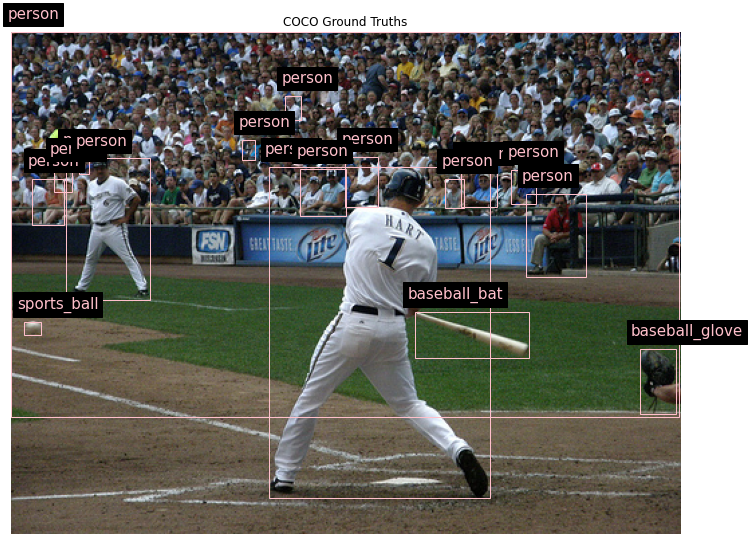

In [7]:
tags = object_tags[image_id]['coco']

get_image_with_obj_labels(path, tags, colour="pink", title="COCO Ground Truths")

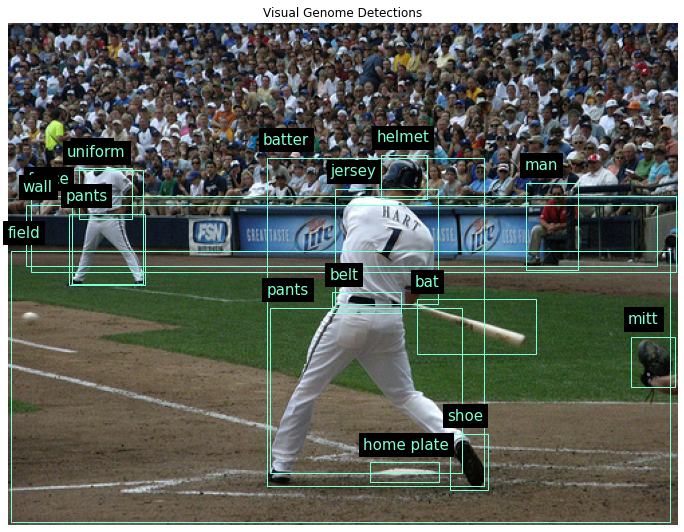

In [8]:
tags = object_tags[image_id]['vg']

get_image_with_obj_labels(path, tags, colour="aquamarine", title="Visual Genome Detections")

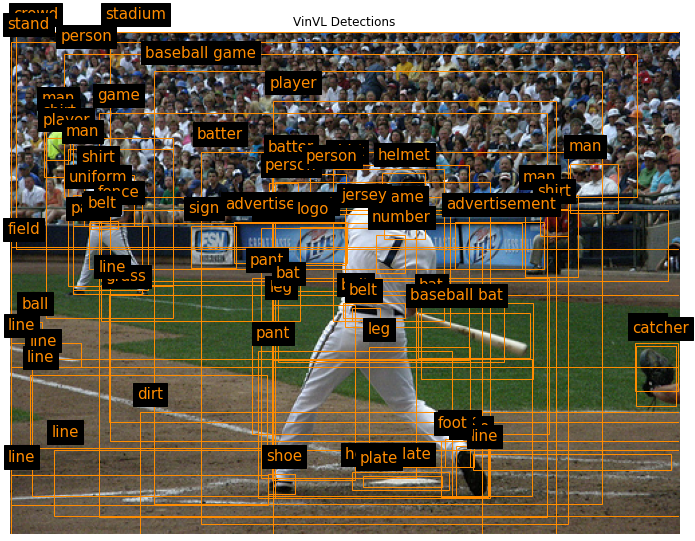

In [9]:
tags = object_tags[image_id]['vinvl']

get_image_with_obj_labels(path, tags, colour="darkorange", title="VinVL Detections")